In [13]:
#import libraries
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

1\. Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named "data_int.txt". Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named "data_float.txt". Use the `cat` command to print the content of the file.
+ load the txt file of the previous point and convert it to a csv file by hand.

In [14]:
#Create a list of integer
list_int = [i for i in range(100)]
file = open("data_int.txt","w")

for j in list_int:
    file.write(str(j)+"\n")
file.close()

In [15]:
#Creating a matrix of 5x5 floats
 
value = np.arange(25, dtype=float).reshape(5,5)
print(value)
floatfile= open("data_float.txt","w")


[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24.]]


In [16]:
np.savetxt("data_float.txt",value, fmt="%0.3f")
!type data_float.txt

0.000 1.000 2.000 3.000 4.000
5.000 6.000 7.000 8.000 9.000
10.000 11.000 12.000 13.000 14.000
15.000 16.000 17.000 18.000 19.000
20.000 21.000 22.000 23.000 24.000


In [17]:
headl =['A']
read_file = pd.read_fwf (r'data_int.txt', delim_whitespace=True, names=['col1']) # add header 
!type data_float.txt

0.000 1.000 2.000 3.000 4.000
5.000 6.000 7.000 8.000 9.000
10.000 11.000 12.000 13.000 14.000
15.000 16.000 17.000 18.000 19.000
20.000 21.000 22.000 23.000 24.000


In [20]:
#Converting float text file into csv file
read_float = pd.read_table('data_float.txt',sep=' ',names=['A','B','C','D','E'])
read_float.to_csv('data_float.csv',index=None)

dataframe = pd.read_csv('data_float.csv')
dataframe

,A,B,C,D,E
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0
4,20.0,21.0,22.0,23.0,24.0


2\. Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [24]:
# load the json file
dataframe =  pd.read_json('user_data.json')

Filter= dataframe[dataframe['CreditCardType']=='American Express']
print(Filter)

credit.to_csv('American_Express.csv',index=None)

      ID               JobTitle                       EmailAddress  \
1      2    Investment  Advisor       Clint_Thorpe5003@bulaffy.com   
11    12         Retail Trainee   Phillip_Carpenter9505@famism.biz   
27    28        Project Manager        Russel_Graves1378@extex.org   
38    39            Stockbroker       Leanne_Newton1268@typill.biz   
56    57         Budget Analyst          Tony_Giles1960@iatim.tech   
61    62           CNC Operator        Owen_Allcott5125@bauros.biz   
67    68        Project Manager           Liam_Lynn3280@kideod.biz   
73    74                Dentist      Regina_Woodcock5820@yahoo.com   
80    81          HR Specialist       Carter_Wallace9614@atink.com   
91    92    Staffing Consultant           Maia_Stark2797@jiman.org   
96    97            Stockbroker          Ciara_Lomax982@bauros.biz   
115  116    Staffing Consultant      Isabel_Ellwood1475@fuliss.net   
147  148           CNC Operator  Abdul_Townend2202@infotech44.tech   
149  150            

3\. Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [32]:
#libraries
import io
import dropbox
import urllib.request

#Load directly from URL using dropbox library
url = 'https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv?dl=1'
a = urllib.request.urlopen(url)
data = a.read()
a.close()

with open('mushrooms_categorized.csv', "wb") as f :
    f.write(data)

feature_average = pd.read_csv('mushrooms_categorized.csv') #read csv
featavg_j = feature_average.groupby('class').mean() # group the data + take the average


# write to json file
import json
featavg_j.to_json('class_cat.json')
json=pd.read_json('class_cat.json')
json

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,3.266160,1.615970,4.581749,0.653992,4.334601,0.954373,0.285171,0.068441,6.622624,0.615970,...,1.798479,6.098859,6.064639,0,1.931559,1.125475,3.007605,3.201521,3.283270,1.148289
1,3.436159,2.055158,4.421859,0.159346,3.940756,0.995403,0.028601,0.567926,2.863636,0.514811,...,1.394280,5.512768,5.504597,0,2.002043,1.009193,1.522983,4.021450,4.031665,1.895812


4\. Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [39]:
ind=1
character = 6 #bit
with open('credit_card.dat') as file:
    for card in file:
        code=[]
        for i in range(0,len(card),character):
            code.append(chr(int(card[i:i+character],2))) #convert the latter to a char
        if ind<51:
            print(ind,"".join(code))
        ind+=1

1 7648 5673 3775 2271

2 3257 8247 3354 2266

3 2722 0001 4011 6652

4 0661 3063 3742 3150

5 0432 1608 1462 4742

6 5827 2027 8785 7303

7 5774 8528 2087 1117

8 8140 1210 6352 2845

9 5764 1133 7301 7100

10 6456 1737 4126 6726

11 1228 8631 7382 0000

12 7051 0160 5374 3166

13 0618 3587 1630 6376

14 1545 5454 7444 5636

15 6735 3116 3202 6834

16 7287 5011 1547 8413

17 7033 2607 3328 4200

18 2568 5244 1874 5024

19 1684 2253 7570 7118

20 0672 2576 0575 6631

21 6332 8353 8787 1340

22 1813 3361 1175 4211

23 2477 6450 8840 2368

24 5512 3505 2563 1326

25 3083 7882 0621 0025

26 4521 5148 8045 0334

27 7563 3654 8713 5787

28 8324 2664 0476 5561

29 0565 2504 7168 3510

30 5107 5507 1767 0738

31 2462 1821 2448 1443

32 2788 0638 6861 6554

33 5851 5873 5474 0547

34 0670 1004 4013 2655

35 5874 5506 3048 0806

36 2805 5401 8462 1260

37 5083 8406 6310 1862

38 1076 1445 3013 2266

39 8440 4804 4844 5277

40 4758 6141 0686 1387

41 7586 0675 0315 2568

42 2544 1258 7432 5165

4

5\. **Optional**: load the remote file:

- https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

with Pandas and create a scatter plot with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3

<AxesSubplot:xlabel='features_1', ylabel='features_3'>

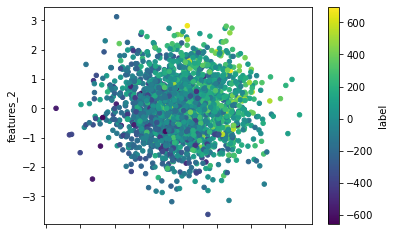

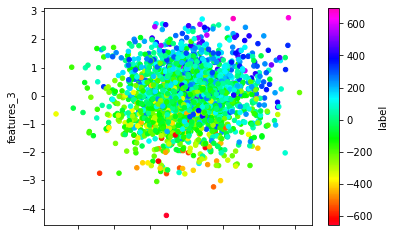

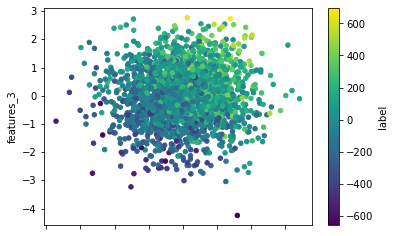

In [40]:
#Load directly from URL using dropbox library
url='https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv?dl=1'
data = pd.read_csv(url) 


# ploting the features 
%matplotlib inline
data.plot.scatter(x='features_1',y='features_2',c='label',colormap='viridis')
data.plot.scatter(x='features_2',y='features_3',c='label',colormap='gist_rainbow')
data.plot.scatter(x='features_1',y='features_3',c='label',colormap='viridis')